In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
import matplotlib.pyplot as plot
import pickle
from matplotlib import style

In [2]:
#reading data

In [3]:
data=pd.read_csv('housing.csv')
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
#removing missing values

In [10]:
data=data.dropna()

In [6]:
#manipulating data

In [11]:
u=data.ocean_proximity.unique()
u

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [12]:
data['ocean_proximity']=data['ocean_proximity'].replace(['INLAND','NEAR BAY','<1H OCEAN','NEAR OCEAN','ISLAND'],[1,2,3,4,5])
data

<ipython-input-12-660f99e9fb34>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ocean_proximity']=data['ocean_proximity'].replace(['INLAND','NEAR BAY','<1H OCEAN','NEAR OCEAN','ISLAND'],[1,2,3,4,5])


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,2
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,2
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,2
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,2
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,2
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1


In [9]:
#trimming data

In [13]:
data=data[['housing_median_age','total_rooms','total_bedrooms','population','households','median_income','ocean_proximity','median_house_value']]
data

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,41.0,880.0,129.0,322.0,126.0,8.3252,2,452600.0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,2,358500.0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,2,352100.0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,2,341300.0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,2,342200.0
...,...,...,...,...,...,...,...,...
20635,25.0,1665.0,374.0,845.0,330.0,1.5603,1,78100.0
20636,18.0,697.0,150.0,356.0,114.0,2.5568,1,77100.0
20637,17.0,2254.0,485.0,1007.0,433.0,1.7000,1,92300.0
20638,18.0,1860.0,409.0,741.0,349.0,1.8672,1,84700.0


In [ ]:
#splitting

In [14]:
predict='median_house_value'

In [15]:
x=np.array(data.drop([predict],1))
y=np.array(data[predict])
x_train,x_test,y_train,y_test=sklearn.model_selection.train_test_split(x,y,test_size=0.1)

In [16]:
#training

In [17]:
best=0

In [19]:
for _ in range(100):
    
    x_train,x_test,y_train,y_test=sklearn.model_selection.train_test_split(x,y,test_size=0.1)
    #splits 10% of our data for testing 
    linear=linear_model.LinearRegression()
    #training data
    linear.fit(x_train,y_train) # going to fit x_train data and y_train data to find the best fit line
    acc=linear.score(x_test,y_test) #will tell the accuracy of our model
    print(acc)
    if acc>best:
        with open("housepricemodel.pickle",'wb') as f:
            pickle.dump(linear,f)

0.6181733151566041
0.6400684272146671
0.6182835832329718
0.6121015822057233
0.6468112456719685
0.6229973854302941
0.6177877439060819
0.5973925660001776
0.5989668920593115
0.6172771624139218
0.6127591932621301
0.6091907556342857
0.6089613715987408
0.6294569311849212
0.6159894093644032
0.6519247403836084
0.6200679402680713
0.6133974925541308
0.6300738781275881
0.6022504262131763
0.6551929445185531
0.6250825582255628
0.5873614039268478
0.5817922872957995
0.624773155532645
0.6267550337031274
0.5981099057088621
0.6456384933719655
0.6219094833184321
0.625368787617306
0.5943810956393868
0.6132317603580015
0.6502623977884989
0.608090290582957
0.6475792113493732
0.5902034958366335
0.6022201570281931
0.6354736496257392
0.6455066998776562
0.6144817993717817
0.6171052831740316
0.6260904392020441
0.6016711004110544
0.625515937074306
0.6040187915373152
0.6304247852902367
0.6026038129032294
0.6354827905983691
0.6244749899237589
0.6229400450396858
0.6231648110455996
0.6345125684025705
0.65562859089088

In [20]:
pickle_in=open("housepricemodel.pickle",'rb')
linear=pickle.load(pickle_in)

In [21]:
#testing

In [22]:
predictions=linear.predict(x_test)
for x in range(len(predictions)):
    print(predictions[x],x_test[x],y_test[x])

160787.12087591595 [  33.     1495.      474.     1272.      447.        2.0694    3.    ] 143500.0
315806.5799501631 [  34.     1971.      316.      917.      307.        6.0965    3.    ] 262300.0
243447.89233624912 [  35.     1213.      200.      532.      181.        3.6806    4.    ] 172400.0
104756.71086594815 [  30.      950.      317.     1073.      280.        1.8664    2.    ] 107800.0
194188.06882867013 [1.6000e+01 6.3520e+03 1.7470e+03 5.0850e+03 1.6490e+03 2.8835e+00
 3.0000e+00] 193800.0
184287.06091188692 [  13.     1330.      216.      719.      215.        3.8295    3.    ] 149600.0
207056.68377106742 [  38.     1683.      328.     1369.      339.        3.6196    3.    ] 170700.0
325392.010828505 [5.2000e+01 3.1460e+03 4.7800e+02 1.1430e+03 4.5500e+02 6.1407e+00
 2.0000e+00] 500001.0
182143.32487878005 [2.600e+01 3.135e+03 5.240e+02 1.385e+03 5.230e+02 4.337e+00 1.000e+00] 139700.0
188483.2997633604 [  42.     1308.      289.      950.      302.        2.7379    3.   

111428.18706749592 [ 52.     966.     247.     589.     228.       1.6937   1.    ] 108300.0
186757.8346960601 [  35.     2342.      426.     2176.      416.        3.7454    3.    ] 156900.0
152767.21017221612 [1.2000e+01 9.8310e+03 1.9210e+03 4.6440e+03 1.7750e+03 3.1142e+00
 1.0000e+00] 112600.0
294035.5046692625 [  21.     2696.      548.     1142.      473.        5.6091    3.    ] 356800.0
245432.0475855061 [  36.     1597.      285.      901.      272.        4.3947    3.    ] 197000.0
230480.93869085232 [  31.     2887.      646.     1626.      637.        3.6745    3.    ] 335500.0
121623.47820043191 [5.2000e+01 1.5030e+03 3.6700e+02 5.5400e+02 2.7700e+02 1.6786e+00
 1.0000e+00] 126600.0
82970.55078170897 [4.0000e+01 1.0640e+03 2.6600e+02 9.1200e+02 2.3900e+02 1.0521e+00
 2.0000e+00] 69100.0
160488.72422966285 [  12.     1086.      294.      870.      290.        2.4213    4.    ] 132500.0
188352.24672361353 [  36.    1722.     353.    1174.     335.       3.045    3.   ] 1606

172443.79809888292 [4.0000e+00 1.4348e+04 2.1450e+03 5.8390e+03 1.8060e+03 5.3799e+00
 1.0000e+00] 222400.0
245149.36049530603 [  52.     1311.      310.      707.      290.        3.4812    3.    ] 432800.0
175773.5108571174 [3.400e+01 2.590e+03 6.030e+02 1.658e+03 6.080e+02 2.378e+00 3.000e+00] 199600.0
351089.46204164776 [3.7000e+01 3.8810e+03 5.6000e+02 1.3150e+03 5.1700e+02 7.3195e+00
 2.0000e+00] 367500.0
79500.1359550071 [2.7000e+01 1.9450e+03 4.4600e+02 8.5900e+02 4.1800e+02 1.5203e+00
 1.0000e+00] 126200.0
293682.33827507414 [2.6000e+01 3.6380e+03 5.5700e+02 1.9930e+03 5.9300e+02 6.1076e+00
 3.0000e+00] 221200.0
214586.9114737991 [2.7000e+01 3.7600e+03 8.8000e+02 2.0220e+03 8.1200e+02 3.1551e+00
 3.0000e+00] 225600.0
232892.93894816982 [2.1000e+01 6.1080e+03 1.1300e+03 3.2440e+03 1.1130e+03 4.2768e+00
 3.0000e+00] 181400.0
202838.9148152183 [  29.   1677.    413.    873.    400.      3.12    3.  ] 194300.0
223543.6091085949 [  50.     1922.      427.     1049.      443.       

251834.59566971508 [  6.     575.      73.     318.      88.       7.0215   1.    ] 257100.0
174825.4737988828 [  34.     1793.      480.     1722.      441.        2.8235    3.    ] 153100.0
243369.08430496673 [1.7000e+01 3.2180e+03 9.2300e+02 1.7010e+03 8.2400e+02 3.6946e+00
 3.0000e+00] 265500.0
254138.6866904017 [  36.     2831.      669.     1279.      660.        2.9896    4.    ] 252700.0
351328.3945390367 [1.5000e+01 3.2440e+03 4.2100e+02 1.2590e+03 4.1300e+02 7.7854e+00
 3.0000e+00] 395300.0
101085.85928626751 [1.700e+01 1.133e+03 2.440e+02 7.160e+02 2.350e+02 2.875e+00 1.000e+00] 162500.0
343223.0148135944 [  29.     2023.      330.      747.      304.        6.7694    3.    ] 369700.0
235821.6066455749 [  17.     1317.      256.      679.      272.        4.6696    3.    ] 159500.0
279317.98836188 [  30.    1751.     269.     731.     263.       6.005    2.   ] 263900.0
335083.54557602666 [2.5000e+01 4.9210e+03 8.6600e+02 1.9130e+03 8.3400e+02 6.8742e+00
 2.0000e+00] 413100.

212710.50349403807 [  16. 2715.  581. 1619.  584.    4.    3.] 154700.0
302555.4332760221 [  20.     2439.      474.     1219.      497.        5.9619    3.    ] 335900.0
156186.7184606066 [ 44.     617.     131.     378.     135.       2.5568   2.    ] 111100.0
236113.65822986496 [  13.     1422.      295.      395.      195.        5.3247    2.    ] 327800.0
269468.34849648847 [3.3000e+01 3.9940e+03 7.6400e+02 2.7210e+03 7.6300e+02 5.2308e+00
 3.0000e+00] 196900.0
148374.12704171886 [  48.     1052.      234.      793.      216.        1.6585    3.    ] 92900.0
86119.48561013641 [2.7000e+01 1.4920e+03 3.9300e+02 7.1700e+02 2.5400e+02 1.8906e+00
 1.0000e+00] 104200.0
277230.6879269428 [2.0000e+00 3.0450e+04 5.0330e+03 9.4190e+03 3.1970e+03 4.5936e+00
 3.0000e+00] 174300.0
275671.3167687176 [   7.     3703.      679.     1375.      608.        4.9219    4.    ] 368400.0
228209.4974439366 [5.200e+01 2.645e+03 6.260e+02 1.275e+03 5.530e+02 3.350e+00 2.000e+00] 492900.0
185830.13684907445

 1.0000e+00] 105300.0
113470.46565522972 [1.4000e+01 1.2870e+03 2.9100e+02 7.3700e+02 2.6900e+02 3.1667e+00
 1.0000e+00] 126400.0
221541.36758628138 [  39.    1420.     272.     645.     277.       4.125    2.   ] 232500.0
230071.92150020623 [2.7000e+01 2.8630e+03 7.1100e+02 9.3000e+02 5.3300e+02 2.6205e+00
 4.0000e+00] 221100.0
228534.96918414294 [1.7000e+01 5.5090e+03 8.6600e+02 2.7480e+03 8.1700e+02 4.8854e+00
 3.0000e+00] 181300.0
423084.553586379 [  21.     3837.      578.     1509.      509.        8.4476    4.    ] 500001.0
159115.47778215903 [  39.      986.      361.     1347.      299.        2.2907    3.    ] 133900.0
287409.7189851768 [  49.     2792.      690.     1301.      648.        3.2917    4.    ] 307400.0
341587.4036795651 [  48.     2764.      491.      978.      449.        5.1249    4.    ] 432400.0
165900.8764673291 [  48.     1252.      305.      673.      308.        2.3357    2.    ] 175000.0
49247.94886880783 [2.2000e+01 1.2830e+03 2.5600e+02 3.0820e+03 2.3

302537.3770263147 [1.5000e+01 5.7780e+03 1.2850e+03 1.7220e+03 8.2900e+02 4.3427e+00
 4.0000e+00] 305800.0
238286.37924020377 [  41.     1420.      338.      640.      314.        2.9306    4.    ] 360300.0
229286.90732909966 [  35.     1439.      261.      804.      271.        3.9808    3.    ] 188600.0
158546.58563123754 [2.200e+01 2.403e+03 4.310e+02 1.088e+03 4.210e+02 3.900e+00 1.000e+00] 146900.0
369704.7237255177 [  21.     2030.      318.      910.      311.        7.8453    3.    ] 343300.0
235403.41873331473 [1.0000e+01 2.0263e+04 3.9150e+03 9.7160e+03 3.7440e+03 3.8505e+00
 1.0000e+00] 169600.0
117402.38960856799 [3.5000e+01 1.5030e+03 3.0900e+02 8.4200e+02 3.0000e+02 2.5278e+00
 1.0000e+00] 97700.0
135387.57868528666 [3.4000e+01 1.0810e+03 2.0500e+02 1.3250e+03 2.5200e+02 3.6298e+00
 1.0000e+00] 108500.0
165905.48051244183 [5.0000e+00 4.4230e+03 7.6300e+02 1.9060e+03 6.6700e+02 4.6855e+00
 1.0000e+00] 125200.0
288518.9015594489 [2.6000e+01 2.1700e+03 3.4700e+02 8.4900e+02 

In [23]:
#plotting

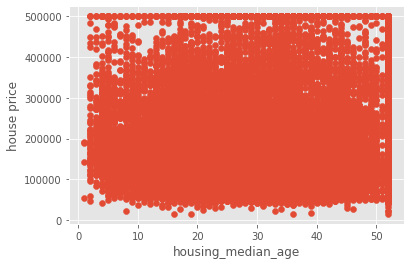

In [25]:
p="housing_median_age"
style.use("ggplot")
plot.scatter(data[p],data['median_house_value'])
plot.xlabel(p)
plot.ylabel('house price')
plot.show()

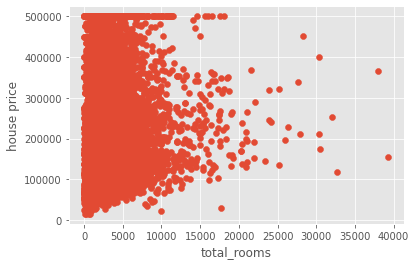

In [26]:
p="total_rooms"
style.use("ggplot")
plot.scatter(data[p],data['median_house_value'])
plot.xlabel(p)
plot.ylabel('house price')
plot.show()

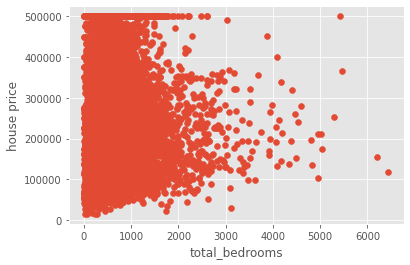

In [27]:
p="total_bedrooms"
style.use("ggplot")
plot.scatter(data[p],data['median_house_value'])
plot.xlabel(p)
plot.ylabel('house price')
plot.show()

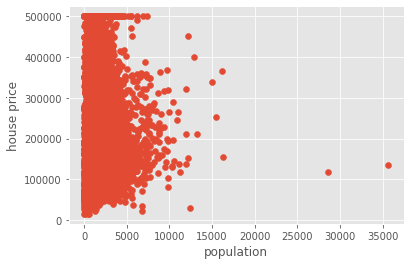

In [28]:
p="population"
style.use("ggplot")
plot.scatter(data[p],data['median_house_value'])
plot.xlabel(p)
plot.ylabel('house price')
plot.show()

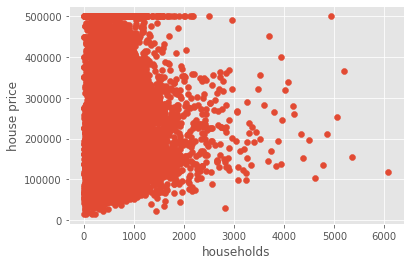

In [29]:
p="households"
style.use("ggplot")
plot.scatter(data[p],data['median_house_value'])
plot.xlabel(p)
plot.ylabel('house price')
plot.show()

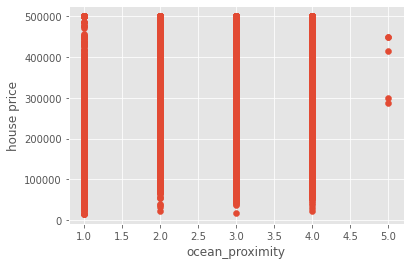

In [30]:
p="ocean_proximity"
style.use("ggplot")
plot.scatter(data[p],data['median_house_value'])
plot.xlabel(p)
plot.ylabel('house price')
plot.show()